In [1]:
##Importing Lib
import numpy as np
import pandas as pd
#from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import random
from sklearn import preprocessing
from sklearn import utils
from sklearn import model_selection

In [2]:
#dataset
data=pd.read_csv("housing.csv",encoding='utf-8',header=None)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
data.shape

(506, 14)

In [5]:
cols = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

In [6]:
data.columns = cols

In [7]:
data.shape

(506, 14)

In [8]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [10]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [11]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


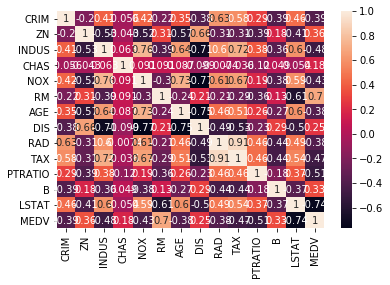

In [12]:
sns.heatmap(data.corr(), annot=True)

In [13]:
X = data.iloc[:,:-1]
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [14]:
Y = data['MEDV']
Y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [16]:
### Random Forest
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor(n_estimators=10)
model.fit(X_train,Y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [17]:
y_train_predict = model.predict(X_train)
y_train_predict

array([13.54, 48.46,  9.52, 19.86, 13.16, 42.96, 23.45, 17.83, 24.63,
       22.63, 12.65, 30.92, 14.99, 13.44, 23.97, 16.77, 19.29, 17.58,
       19.22, 35.39, 22.11, 18.08, 21.58, 25.63, 20.89, 20.93, 19.32,
       50.  , 49.02, 22.7 , 10.35, 16.75, 11.01, 21.61, 13.83,  9.21,
       22.58, 30.62, 19.9 , 16.13, 19.53, 20.54, 33.8 , 47.26, 25.97,
       18.4 , 20.17, 22.86, 14.97, 46.61, 10.92, 13.57, 29.35, 33.89,
       15.33, 24.07, 33.11, 32.38, 14.32, 33.91, 15.77, 34.84, 25.16,
       17.94, 16.78, 13.06, 23.6 , 26.56, 22.63, 17.71, 14.27, 21.87,
        9.  , 16.83, 20.53, 31.87, 20.38, 17.92, 26.92, 45.63, 21.88,
       22.83, 21.1 , 16.11, 49.17, 24.67, 36.56, 23.12, 19.34, 19.06,
       21.92, 16.6 , 26.31, 11.27, 23.46, 25.15, 20.19, 20.5 , 33.05,
       15.42, 28.07, 23.71, 11.38, 33.11, 21.35, 13.59, 33.68, 14.53,
       23.3 , 23.62, 19.92, 20.27, 20.53, 24.81, 20.55, 29.39, 21.06,
       19.71, 12.47,  8.93, 23.42, 20.59, 22.74, 20.35, 14.9 , 30.19,
       42.46, 19.14,

In [18]:
from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
rmse

1.4678984944808038

In [20]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_train, y_train_predict)
r2

0.9749163747499509

In [21]:
import pickle

In [22]:
filename = 'house_model.pkl'

In [24]:
pickle.dump(model, open(filename, 'wb'))

In [25]:
model_hs = pickle.load(open(filename, 'rb'))

In [29]:
accuracy = model_hs.score(X_test, Y_test)

In [30]:
print(accuracy*100, '%')

86.23659159997182 %
